## Imports

In [1]:
from book_rec_app import VespaApp
import pandas as pd
import openai
import os
from llm_model import LLM_Model
import numpy as np
from vespa.io import VespaResponse, VespaQueryResponse

## Deployment

In [2]:
app = VespaApp()

Waiting for configuration server, 0/60 seconds...
Waiting for configuration server, 5/60 seconds...
Waiting for configuration server, 10/60 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 0/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 5/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 10/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 15/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 20/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 25/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 3

## Planilha Preenchimento Manual

In [87]:
with app.syncio(connections=12) as session:
    response_space_travel: VespaQueryResponse = session.query(
        hits=10,
        body={
            "yql": "select documentid, cord_uid, title, description, abstract from sources * where userQuery() LIMIT 100",
            "query": "books about space travel",
            "ranking.profile": "bm25",
            "presentation.timing": True,
        },
    )
    print(response_space_travel.json)

{'timing': {'querytime': 0.03, 'summaryfetchtime': 0.046, 'searchtime': 0.078}, 'root': {'id': 'toplevel', 'relevance': 1.0, 'fields': {'totalCount': 426}, 'coverage': {'coverage': 100, 'documents': 6483, 'full': True, 'nodes': 1, 'results': 1, 'resultsFull': 1}, 'children': [{'id': 'id:bookrec:doc::1416505490', 'relevance': 13.011441073719094, 'source': 'hybridsearchbv_content', 'fields': {'description': 'Teenager Clifford "Kip" Russell wins second prize in a soap jingle contest, a used worn spacesuit, and, while trying on his prize in his backyard, suddenly finds himself on a <hi>space</hi> odyssey as a prisoner aboard the ship of a <hi>space</hi> pirate, headed toward the Moon and a series of encounters with many bizarre creatures and situations. Reprint. 10,000 first printing.', 'documentid': 'id:bookrec:doc::1416505490', 'title': 'Have Space Suit, Will Travel'}}, {'id': 'id:bookrec:doc::0517052253', 'relevance': 11.603122304865535, 'source': 'hybridsearchbv_content', 'fields': {'d

In [56]:
%pip install openpyxl


  Using cached openpyxl-3.1.3-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
Using cached openpyxl-3.1.3-py2.py3-none-any.whl (251 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [88]:
# Assuming response_boy_talk_animals is a VespaQueryResponse object
response_json = response_space_travel.json

# Extracting data
data = []
for item in response_json['root']['children']:
    title = item['fields']['title']
    description = item['fields']['description']
    binary = ''  # Empty value for the binary column
    score = ''   # Empty value for the score column
    data.append([title, description, binary, score])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['title', 'description', 'binary', 'score'])

# Saving to Excel
df.to_excel('books_space_travel.xlsx', index=False)

print("Excel file 'books.xlsx' created successfully.")

Excel file 'books.xlsx' created successfully.


In [92]:
with app.syncio(connections=12) as session:
    response: VespaQueryResponse = session.query(
        hits=10,
        body={
            "yql": "select documentid, cord_uid, title, description, abstract from sources * where userQuery() LIMIT 100",
            "query": "books about romantic love",
            "ranking.profile": "bm25",
            "presentation.timing": True,
        },
    )
    print(response.json)

{'timing': {'querytime': 0.021, 'summaryfetchtime': 0.039, 'searchtime': 0.061}, 'root': {'id': 'toplevel', 'relevance': 1.0, 'fields': {'totalCount': 464}, 'coverage': {'coverage': 100, 'documents': 6483, 'full': True, 'nodes': 1, 'results': 1, 'resultsFull': 1}, 'children': [{'id': 'id:bookrec:doc::0394733525', 'relevance': 12.500838795907017, 'source': 'hybridsearchbv_content', 'fields': {'description': 'A mathematically oriented <hi>romantic</hi> fable <hi>about</hi> the eternal triangle, in this case a straight line who is hopelessly in <hi>love</hi> with a dot who in turn <hi>loves</hi> a squiggle', 'documentid': 'id:bookrec:doc::0394733525', 'title': 'The Dot and the Line'}}, {'id': 'id:bookrec:doc::0747575479', 'relevance': 11.760686926707198, 'source': 'hybridsearchbv_content', 'fields': {'description': 'This is a <hi>romantic</hi> comedy <hi>about</hi> the difficult, frustrating, awful, funny search for happiness in an American city where the primary emotion is unrequited <hi

In [93]:
# Assuming response_boy_talk_animals is a VespaQueryResponse object
response_json = response.json

# Extracting data
data = []
for item in response_json['root']['children']:
    title = item['fields']['title']
    description = item['fields']['description']
    binary = ''  # Empty value for the binary column
    score = ''   # Empty value for the score column
    data.append([title, description, binary, score])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['title', 'description', 'binary', 'score'])

# Saving to Excel
df.to_excel('books_romantic_love.xlsx', index=False)

print("Excel file 'books.xlsx' created successfully.")

Excel file 'books.xlsx' created successfully.


In [94]:
with app.syncio(connections=12) as session:
    response: VespaQueryResponse = session.query(
        hits=10,
        body={
            "yql": "select documentid, cord_uid, title, description, abstract from sources * where userQuery() LIMIT 100",
            "query": "books about wars",
            "ranking.profile": "bm25",
            "presentation.timing": True,
        },
    )
    print(response.json)

{'timing': {'querytime': 0.023, 'summaryfetchtime': 0.038, 'searchtime': 0.063}, 'root': {'id': 'toplevel', 'relevance': 1.0, 'fields': {'totalCount': 535}, 'coverage': {'coverage': 100, 'documents': 6483, 'full': True, 'nodes': 1, 'results': 1, 'resultsFull': 1}, 'children': [{'id': 'id:bookrec:doc::034547760X', 'relevance': 10.775374560786519, 'source': 'hybridsearchbv_content', 'fields': {'description': 'A comprehensive overview of alien beings from the "Star <hi>Wars</hi>" universe provides a physical description of the beings, a description of their homeworld, and where and when they appeared in the Star <hi>Wars</hi> films, novels, cartoon series, comic <hi>books</hi>, or videogames.', 'documentid': 'id:bookrec:doc::034547760X', 'title': 'Star Wars'}}, {'id': 'id:bookrec:doc::1590302257', 'relevance': 10.740315546590772, 'source': 'hybridsearchbv_content', 'fields': {'description': 'Written around the 6th century BC, The Art of <hi>War</hi> is one of the oldest <hi>books</hi> <hi

In [95]:
# Assuming response_boy_talk_animals is a VespaQueryResponse object
response_json = response.json

# Extracting data
data = []
for item in response_json['root']['children']:
    title = item['fields']['title']
    description = item['fields']['description']
    binary = ''  # Empty value for the binary column
    score = ''   # Empty value for the score column
    data.append([title, description, binary, score])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['title', 'description', 'binary', 'score'])

# Saving to Excel
df.to_excel('books_wars.xlsx', index=False)

print("Excel file 'books.xlsx' created successfully.")

Excel file 'books.xlsx' created successfully.


In [96]:
with app.syncio(connections=12) as session:
    response: VespaQueryResponse = session.query(
        hits=10,
        body={
            "yql": "select documentid, cord_uid, title, description, abstract from sources * where userQuery() LIMIT 100",
            "query": "books about cooking",
            "ranking.profile": "bm25",
            "presentation.timing": True,
        },
    )
    print(response.json)

{'timing': {'querytime': 0.017, 'summaryfetchtime': 0.05, 'searchtime': 0.069}, 'root': {'id': 'toplevel', 'relevance': 1.0, 'fields': {'totalCount': 524}, 'coverage': {'coverage': 100, 'documents': 6483, 'full': True, 'nodes': 1, 'results': 1, 'resultsFull': 1}, 'children': [{'id': 'id:bookrec:doc::0141010371', 'relevance': 11.101610430707503, 'source': 'hybridsearchbv_content', 'fields': {'description': "The No 1 bestseller I love this book. It's the very first thing I ever wrote, and I never thought the person worst at English in my school would end up writing a book. It's largely made up of recipes scribbled on the back of order forms and beer mats, collected together in a black bin liner that my wife almost threw away twice - it's a miracle this book ever came to be! Because of this book, a lot of blokes were henpecked into doing a bit of <hi>cooking</hi>. Good job too! The salad and pasta recipes are real winners, but the one people still talk <hi>about</hi> all the time is my pe

In [97]:
# Assuming response_boy_talk_animals is a VespaQueryResponse object
response_json = response.json

# Extracting data
data = []
for item in response_json['root']['children']:
    title = item['fields']['title']
    description = item['fields']['description']
    binary = ''  # Empty value for the binary column
    score = ''   # Empty value for the score column
    data.append([title, description, binary, score])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['title', 'description', 'binary', 'score'])

# Saving to Excel
df.to_excel('books_cooking.xlsx', index=False)

print("Excel file 'books.xlsx' created successfully.")

Excel file 'books.xlsx' created successfully.


In [98]:
with app.syncio(connections=12) as session:
    response: VespaQueryResponse = session.query(
        hits=10,
        body={
            "yql": "select documentid, cord_uid, title, description, abstract from sources * where userQuery() LIMIT 100",
            "query": "thriller books",
            "ranking.profile": "bm25",
            "presentation.timing": True,
        },
    )
    print(response.json)

{'timing': {'querytime': 0.016, 'summaryfetchtime': 0.135, 'searchtime': 0.153}, 'root': {'id': 'toplevel', 'relevance': 1.0, 'fields': {'totalCount': 294}, 'coverage': {'coverage': 100, 'documents': 6483, 'full': True, 'nodes': 1, 'results': 1, 'resultsFull': 1}, 'children': [{'id': 'id:bookrec:doc::1585675172', 'relevance': 7.574690245391311, 'source': 'hybridsearchbv_content', 'fields': {'description': 'Originally published to glowing reviews in 1972, Dow Mossman\'s extraordinary debut is a sweeping coming-of-age novel that developed a passionate cult following - even as it went out of print for more than twenty years. It recently inspired director Mark Moskowitz\'s award-winning documentary film Stone Reader, which was embraced by readers across the country and described by Peter Rainer in New York magazine as "a marvelous literary <hi>thriller</hi> that gets at the way <hi>books</hi> can stay with people forever."', 'documentid': 'id:bookrec:doc::1585675172', 'title': 'The Stones 

In [99]:
# Assuming response_boy_talk_animals is a VespaQueryResponse object
response_json = response.json

# Extracting data
data = []
for item in response_json['root']['children']:
    title = item['fields']['title']
    description = item['fields']['description']
    binary = ''  # Empty value for the binary column
    score = ''   # Empty value for the score column
    data.append([title, description, binary, score])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['title', 'description', 'binary', 'score'])

# Saving to Excel
df.to_excel('books_thrillers.xlsx', index=False)

print("Excel file 'books.xlsx' created successfully.")

Excel file 'books.xlsx' created successfully.


## Teste automatizado modelo LLM

### Híbrido

In [5]:
#openai.api_key = adcionar openai_api_key 

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/bernardovma/dados_livros/main/data.csv")
books_df = df.sample(n=200)
books_df = books_df[['title', 'description']]

In [6]:
llm_model = LLM_Model()#(openai.api_key)

In [7]:
def dcg(relevance_scores, p):
    relevance_scores = np.asfarray(relevance_scores)[:p]
    if relevance_scores.size:
        return np.sum(relevance_scores / np.log2(np.arange(2, relevance_scores.size + 2)))
    return 0.0

def ndcg(relevance_scores, p):
    dcg_p = dcg(relevance_scores, p)
    idcg_p = dcg(sorted(relevance_scores, reverse=True), p)
    if idcg_p == 0:
        return 0.0
    return dcg_p / idcg_p

In [54]:
results = {}
total_appearance_count = 0
total_questions = 0

for index, row in books_df.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions = llm_model.generate_generic_questions(title, description)
    
    results[title] = {
        "questions": questions,
        "appearance_count": 0,
        "total_questions": len(questions),
        "relevance_scores": []
    }
    
    for question in questions:
        search_results = app.query_hybrid(question)
        search_results_titles = list(search_results['title'])
        book_appears = title in search_results_titles
        results[title]["relevance_scores"].append(int(book_appears))
        if book_appears:
            results[title]["appearance_count"] += 1
    
    total_appearance_count += results[title]["appearance_count"]
    total_questions += results[title]["total_questions"]

Processing book: Triumph of the Darksword
Processing book: The Patron Saint of Liars
Processing book: Light
Processing book: My Sister's Keeper
Processing book: How to be Alone
Processing book: El Paso
Processing book: The Bluest Eye
Processing book: The Two Towers
Processing book: Gone for Good
Processing book: Blaming the Victims
Processing book: 五輪書 : 英文版
Processing book: Mister Monday
Processing book: Wilkins' Tooth
Processing book: Wild Magic
Processing book: Spellbound
Processing book: The A.B.C. Murders
Processing book: Six Easy Pieces
Processing book: The Purpose of Your Life
Processing book: I Capture the Castle
Processing book: Laughter in the Dark
Processing book: No More Dead Dogs
Processing book: Thin Air
Processing book: Does Anybody Have a Problem with That?
Processing book: God Knows
Processing book: Fear of Fifty
Processing book: Alone
Processing book: In the Lake of the Woods
Processing book: The Meanest Doll in the World
Processing book: Runaways
Processing book: A W

In [55]:
if total_questions > 0:
    overall_percentage_hybrid = (total_appearance_count / total_questions) * 100
else:
    overall_percentage_hybrid = 0

print(f"Overall percentage: {overall_percentage_hybrid:.2f}%")

Overall percentage: 30.11%


In [56]:
ndcg_scores_hybrid = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores_hybrid[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg_hybrid = np.mean(list(ndcg_scores_hybrid.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg_hybrid:.4f}")

Mean NDCG@10 across all books: 0.4184


### BM_25

In [ ]:
results_bm_25 = {}
total_appearance_count_bm_25 = 0
total_questions_bm_25 = 0

In [36]:
if results_bm_25:
    last_title = list(results_bm_25.keys())[-1]
    last_book_data = results_bm_25.pop(last_title)
    total_appearance_count_bm_25 -= last_book_data["appearance_count"]
    total_questions_bm_25 -= last_book_data["total_questions"]


start_index = len(results_bm_25)
books_to_process = books_df.iloc[start_index:]

for index, row in books_to_process.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions_bm_25 = llm_model.generate_generic_questions(title, description)
    
    results_bm_25[title] = {
        "questions": questions_bm_25,
        "appearance_count": 0,
        "total_questions": len(questions_bm_25),
        "relevance_scores": []
    }
    
    for question in questions_bm_25:
        search_results_bm_25 = app.query_bm25(question)
        search_results_titles_bm_25 = list(search_results_bm_25['title'])
        book_appears_bm_25 = title in search_results_titles_bm_25
        results_bm_25[title]["relevance_scores"].append(int(book_appears_bm_25))
        if book_appears_bm_25:
            results_bm_25[title]["appearance_count"] += 1
    
    total_appearance_count_bm_25 += results_bm_25[title]["appearance_count"]
    total_questions_bm_25 += results_bm_25[title]["total_questions"]

Processing book: The Puppet and the Dwarf
Processing book: A Power Governments Cannot Suppress
Processing book: Discourse on the Origin of Inequality
Processing book: A Farewell to Arms
Processing book: The Portrait of a Lady
Processing book: The Heidi Chronicles
Processing book: Robert Langdon Novels
Processing book: The Price of the Ticket
Processing book: A Chosen Few
Processing book: The Greenlander
Processing book: The Stranger Beside Me
Processing book: King of the Vagabonds
Processing book: A Spy In The House Of Love
Processing book: The Devilish Pleasures of a Duke


In [39]:
if total_questions_bm_25 > 0:
    overall_percentage_bm_25 = (total_appearance_count_bm_25 / total_questions_bm_25) * 100
else:
    overall_percentage_bm_25 = 0

print(f"Overall percentage: {overall_percentage_bm_25:.2f}%")

Overall percentage: 35.94%


In [52]:
ndcg_scores_bm_25 = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results_bm_25.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores_bm_25[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg_bm_25 = np.mean(list(ndcg_scores_bm_25.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg_bm_25:.4f}")

Mean NDCG@10 across all books: 0.4557


### Semântico

In [48]:
results_semantico = {}
total_appearance_count_semantico = 0
total_questions_bm_semantico = 0

In [49]:
if results_semantico:
    last_title = list(results_semantico.keys())[-1]
    last_book_data = results_semantico.pop(last_title)
    total_appearance_count_bm_25 -= last_book_data["appearance_count"]
    total_questions_bm_25 -= last_book_data["total_questions"]


start_index = len(results_semantico)
books_to_process = books_df.iloc[start_index:]

for index, row in books_to_process.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions_semantico = llm_model.generate_generic_questions(title, description)
    
    results_semantico[title] = {
        "questions": questions_semantico,
        "appearance_count": 0,
        "total_questions": len(questions_semantico),
        "relevance_scores": []
    }
    
    for question in questions_semantico:
        search_results_semantico = app.query_semantic(question)
        search_results_titles_semantico = list(search_results_semantico['title'])
        book_appears_semantico = title in search_results_titles_semantico
        results_semantico[title]["relevance_scores"].append(int(book_appears_semantico))
        if book_appears_semantico:
            results_semantico[title]["appearance_count"] += 1
    
    total_appearance_count_semantico += results_semantico[title]["appearance_count"]
    total_questions_bm_semantico += results_semantico[title]["total_questions"]

Processing book: Triumph of the Darksword
Processing book: The Patron Saint of Liars
Processing book: Light
Processing book: My Sister's Keeper
Processing book: How to be Alone
Processing book: El Paso
Processing book: The Bluest Eye
Processing book: The Two Towers
Processing book: Gone for Good
Processing book: Blaming the Victims
Processing book: 五輪書 : 英文版
Processing book: Mister Monday
Processing book: Wilkins' Tooth
Processing book: Wild Magic
Processing book: Spellbound
Processing book: The A.B.C. Murders
Processing book: Six Easy Pieces
Processing book: The Purpose of Your Life
Processing book: I Capture the Castle
Processing book: Laughter in the Dark
Processing book: No More Dead Dogs
Processing book: Thin Air
Processing book: Does Anybody Have a Problem with That?
Processing book: God Knows
Processing book: Fear of Fifty
Processing book: Alone
Processing book: In the Lake of the Woods
Processing book: The Meanest Doll in the World
Processing book: Runaways
Processing book: A W

In [50]:
if total_questions_bm_semantico > 0:
    overall_percentage_semantic = (total_appearance_count_semantico/ total_questions_bm_semantico) * 100
else:
    overall_percentage_semantic = 0

print(f"Overall percentage: {overall_percentage_semantic:.2f}%")

Overall percentage: 28.68%


In [57]:
ndcg_scores_semantic = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results_semantico.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores_semantic[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg_semantic = np.mean(list(ndcg_scores_semantic.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg_semantic:.4f}")

Mean NDCG@10 across all books: 0.3779


### Plots

In [58]:
import matplotlib.pyplot as plt

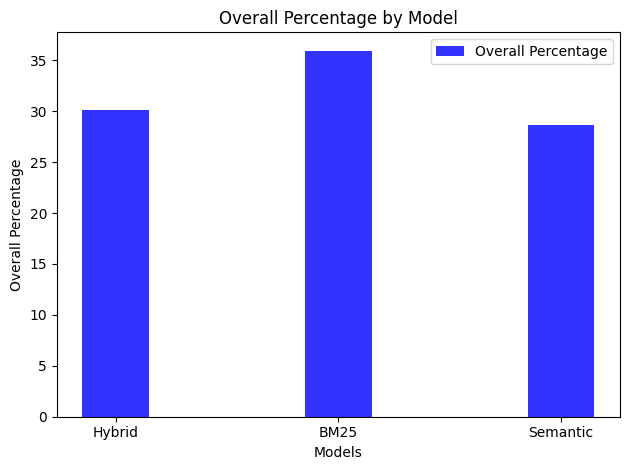

In [59]:
#plot bar graph for the three overall percentages
fig, ax = plt.subplots()
bar_width = 0.3
opacity = 0.8
index = np.arange(3)
rects1 = plt.bar(index, [overall_percentage_hybrid, overall_percentage_bm_25, overall_percentage_semantic], bar_width, alpha=opacity, color='b', label='Overall Percentage')
plt.xlabel('Models')
plt.ylabel('Overall Percentage')
plt.title('Overall Percentage by Model')
plt.xticks(index, ['Hybrid', 'BM25', 'Semantic'])
plt.legend()
plt.tight_layout()
plt.show()


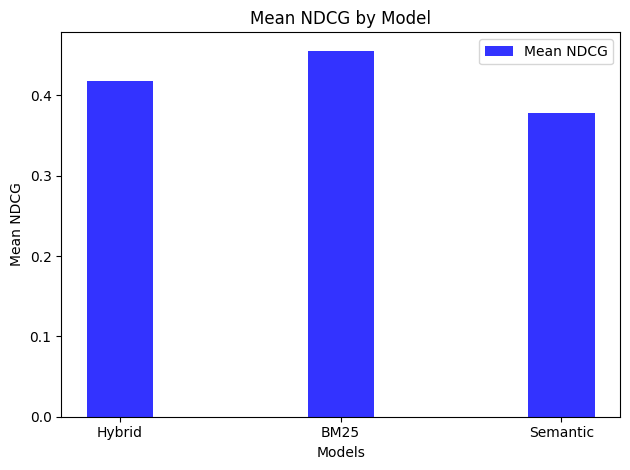

In [60]:
fig, ax = plt.subplots()
bar_width = 0.3
opacity = 0.8
index = np.arange(3)
rects1 = plt.bar(index, [mean_ndcg_hybrid, mean_ndcg_bm_25, mean_ndcg_semantic], bar_width, alpha=opacity, color='b', label='Mean NDCG')
plt.xlabel('Models')
plt.ylabel('Mean NDCG')
plt.title('Mean NDCG by Model')
plt.xticks(index, ['Hybrid', 'BM25', 'Semantic'])
plt.legend()
plt.tight_layout()
plt.show()

##  Colbert

In [1]:
from colbert.infra import ColBERTConfig
from colbert.indexing.collection_indexer import CollectionIndexer
import pandas as pd

c:\Users\Bernardo Vargas\Desktop\Projetos\Projetos-Novo - Final\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
books_df = pd.read_csv("https://raw.githubusercontent.com/bernardovma/dados_livros/main/data.csv")
books_df['text'] = books_df['title'] + ' ' + books_df['authors'] + ' ' + books_df['description'] + ' ' + books_df['categories']

In [28]:
# Add an ID column for each document
books_df['id'] = books_df.index

# Save the data to a TSV file with 'id' and 'text' columns
books_df[['id', 'text']].to_csv('books_texts.tsv', index=False, header=False, sep='\t', encoding='utf-8')


In [14]:
config = ColBERTConfig(checkpoint='colbertv2.0')

In [13]:
with open('books_texts.tsv', 'r', errors='ignore') as f:
    lines = f.readlines()

# Write these lines back to a file to ensure correct encoding is used
with open('books_texts_utf8.tsv', 'w', errors='ignore') as f:
    f.writelines(lines)

# Index the data using ColBERT
indexer = CollectionIndexer(config=config, collection='books_texts_utf8.tsv')
indexer.index()

# Index the data using ColBERT
indexer = CollectionIndexer(config=config, collection='books_texts_utf8.tsv')
indexer.index()

{
    "query_token_id": "[unused0]",
    "doc_token_id": "[unused1]",
    "query_token": "[Q]",
    "doc_token": "[D]",
    "ncells": null,
    "centroid_score_threshold": null,
    "ndocs": null,
    "load_index_with_mmap": false,
    "index_path": null,
    "nbits": 1,
    "kmeans_niters": 4,
    "resume": false,
    "similarity": "cosine",
    "bsize": 32,
    "accumsteps": 1,
    "lr": 3e-6,
    "maxsteps": 500000,
    "save_every": null,
    "warmup": null,
    "warmup_bert": null,
    "relu": false,
    "nway": 2,
    "use_ib_negatives": false,
    "reranker": false,
    "distillation_alpha": 1.0,
    "ignore_scores": false,
    "model_name": null,
    "query_maxlen": 32,
    "attend_to_mask_tokens": false,
    "interaction": "colbert",
    "dim": 128,
    "doc_maxlen": 220,
    "mask_punctuation": true,
    "checkpoint": "colbertv2.0\\pytorch_model.bin",
    "triples": null,
    "collection": null,
    "queries": null,
    "index_name": null,
    "overwrite": false,
    "root": 

c:\Users\Bernardo Vargas\Desktop\Projetos\Projetos-Novo - Final\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Bernardo Vargas\Desktop\Projetos\Projetos-Novo - Final\.venv\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Bernardo Vargas\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Win

OSError: Incorrect path_or_model_id: 'colbertv2.0\pytorch_model.bin'. Please provide either the path to a local folder or the repo_id of a model on the Hub.